# Boston Housing with Linear Regression
**With this data our objective is create a model using linear regression to predict the houses price**

The data contains the following columns:
* 'crim': per capita crime rate by town.
* 'zn': proportion of residential land zoned for lots over 25,000 sq.ft.
* 'indus': proportion of non-retail business acres per town.
* 'chas':Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* 'nox': nitrogen oxides concentration (parts per 10 million).
* 'rm': average number of rooms per dwelling.
* 'age': proportion of owner-occupied units built prior to 1940.
* 'dis': weighted mean of distances to five Boston employment centres.
* 'rad': index of accessibility to radial highways.
* 'tax': full-value property-tax rate per $10,000.
* 'ptratio': pupil-teacher ratio by town
* 'black': 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* 'lstat': lower status of the population (percent).
* 'medv': median value of owner-occupied homes in $$1000s

**Lets Start**

First we need to prepare our enviroment importing some librarys

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing DataSet and take a look at Data
BostonTrain = pd.read_csv("./data/boston_train.csv")

** Here we can look at the BostonTrain data **

In [4]:
#BostonTrain.head()
#BostonTrain.info()
BostonTrain.describe()

ID        crim          zn       indus        chas         nox  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952    3.360341   10.689189   11.293483    0.060060    0.557144   
std    147.859438    7.352272   22.674762    6.998123    0.237956    0.114955   
min      1.000000    0.006320    0.000000    0.740000    0.000000    0.385000   
25%    123.000000    0.078960    0.000000    5.130000    0.000000    0.453000   
50%    244.000000    0.261690    0.000000    9.900000    0.000000    0.538000   
75%    377.000000    3.678220   12.500000   18.100000    0.000000    0.631000   
max    506.000000   73.534100  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean     6.265619   68.226426    3.709934    9.633634  409.279279   18.448048   
std      0.703952   28.133344    1.981123    8.742174  170.841988    2.151821   
min      3.561000    6.000000    1.129600    1.000000  188.000000   12.600000   
25%      5.884000   45.400000    2.122400    4.000000  279.000000   17.400000   
50%      6.202000   76.700000    3.092300    5.000000  330.000000   19.000000   
75%      6.595000   93.800000    5.116700   24.000000  666.000000   20.200000   
max      8.725000  100.000000   10.710300   24.000000  711.000000   21.200000   

            black       lstat        medv  
count  333.000000  333.000000  333.000000  
mean   359.466096   12.515435   22.768769  
std     86.584567    7.067781    9.173468  
min      3.500000    1.730000    5.000000  
25%    376.730000    7.180000   17.400000  
50%    392.050000   10.970000   21.600000  
75%    396.240000   16.420000   25.000000  
max    396.900000   37.970000   50.000000

** Now, or goal is think about the columns, and discovery which columns is relevant to build our model, because if we consider to put columns with not relevant  with our objective "medv" the model may be not efficient **

In [5]:
#ID columns does not relevant for our analysis.
BostonTrain.drop('ID', axis = 1, inplace=True)

<AxesSubplot:xlabel='rm', ylabel='medv'>

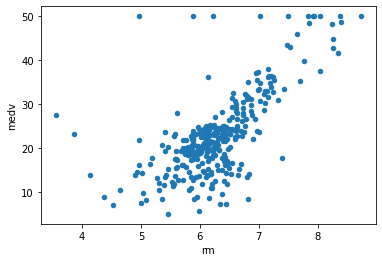

In [6]:
BostonTrain.plot.scatter('rm', 'medv')

In this plot its clearly to see a linear pattern. Wheter more average number of rooms per dwelling, more expensive the median value is.

** Now lets take a loot how the all variables relate to each other. **

<AxesSubplot:>

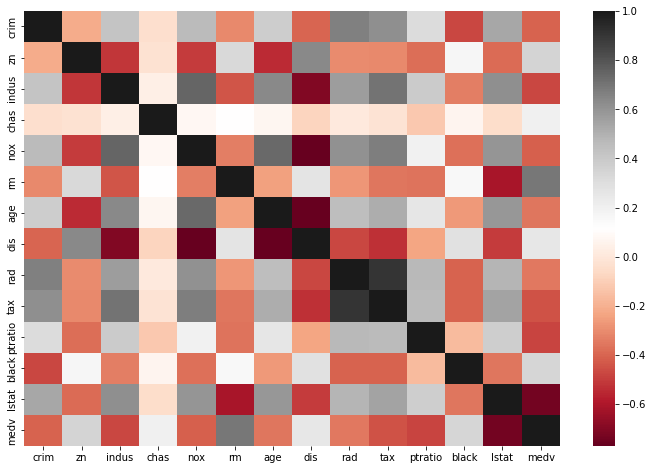

In [7]:
plt.subplots(figsize=(12,8))
sns.heatmap(BostonTrain.corr(), cmap = 'RdGy')

At this heatmap plot, we can do our analysis better than the pairplot.

Lets focus ate the last line, where y = medv:

When shades of Red/Orange: the more red the color is on X axis, smaller the medv. Negative correlation                           
When light colors: those variables at axis x and y, they dont have any relation. Zero correlation                               
When shades of Gray/Black : the more black the color is on X axis, more higher the value med is. Positive correlation

**Lets plot the paiplot, for all different correlations**

Negative Correlation. 

When x is high y is low and vice versa.

To the right less negative correlation.

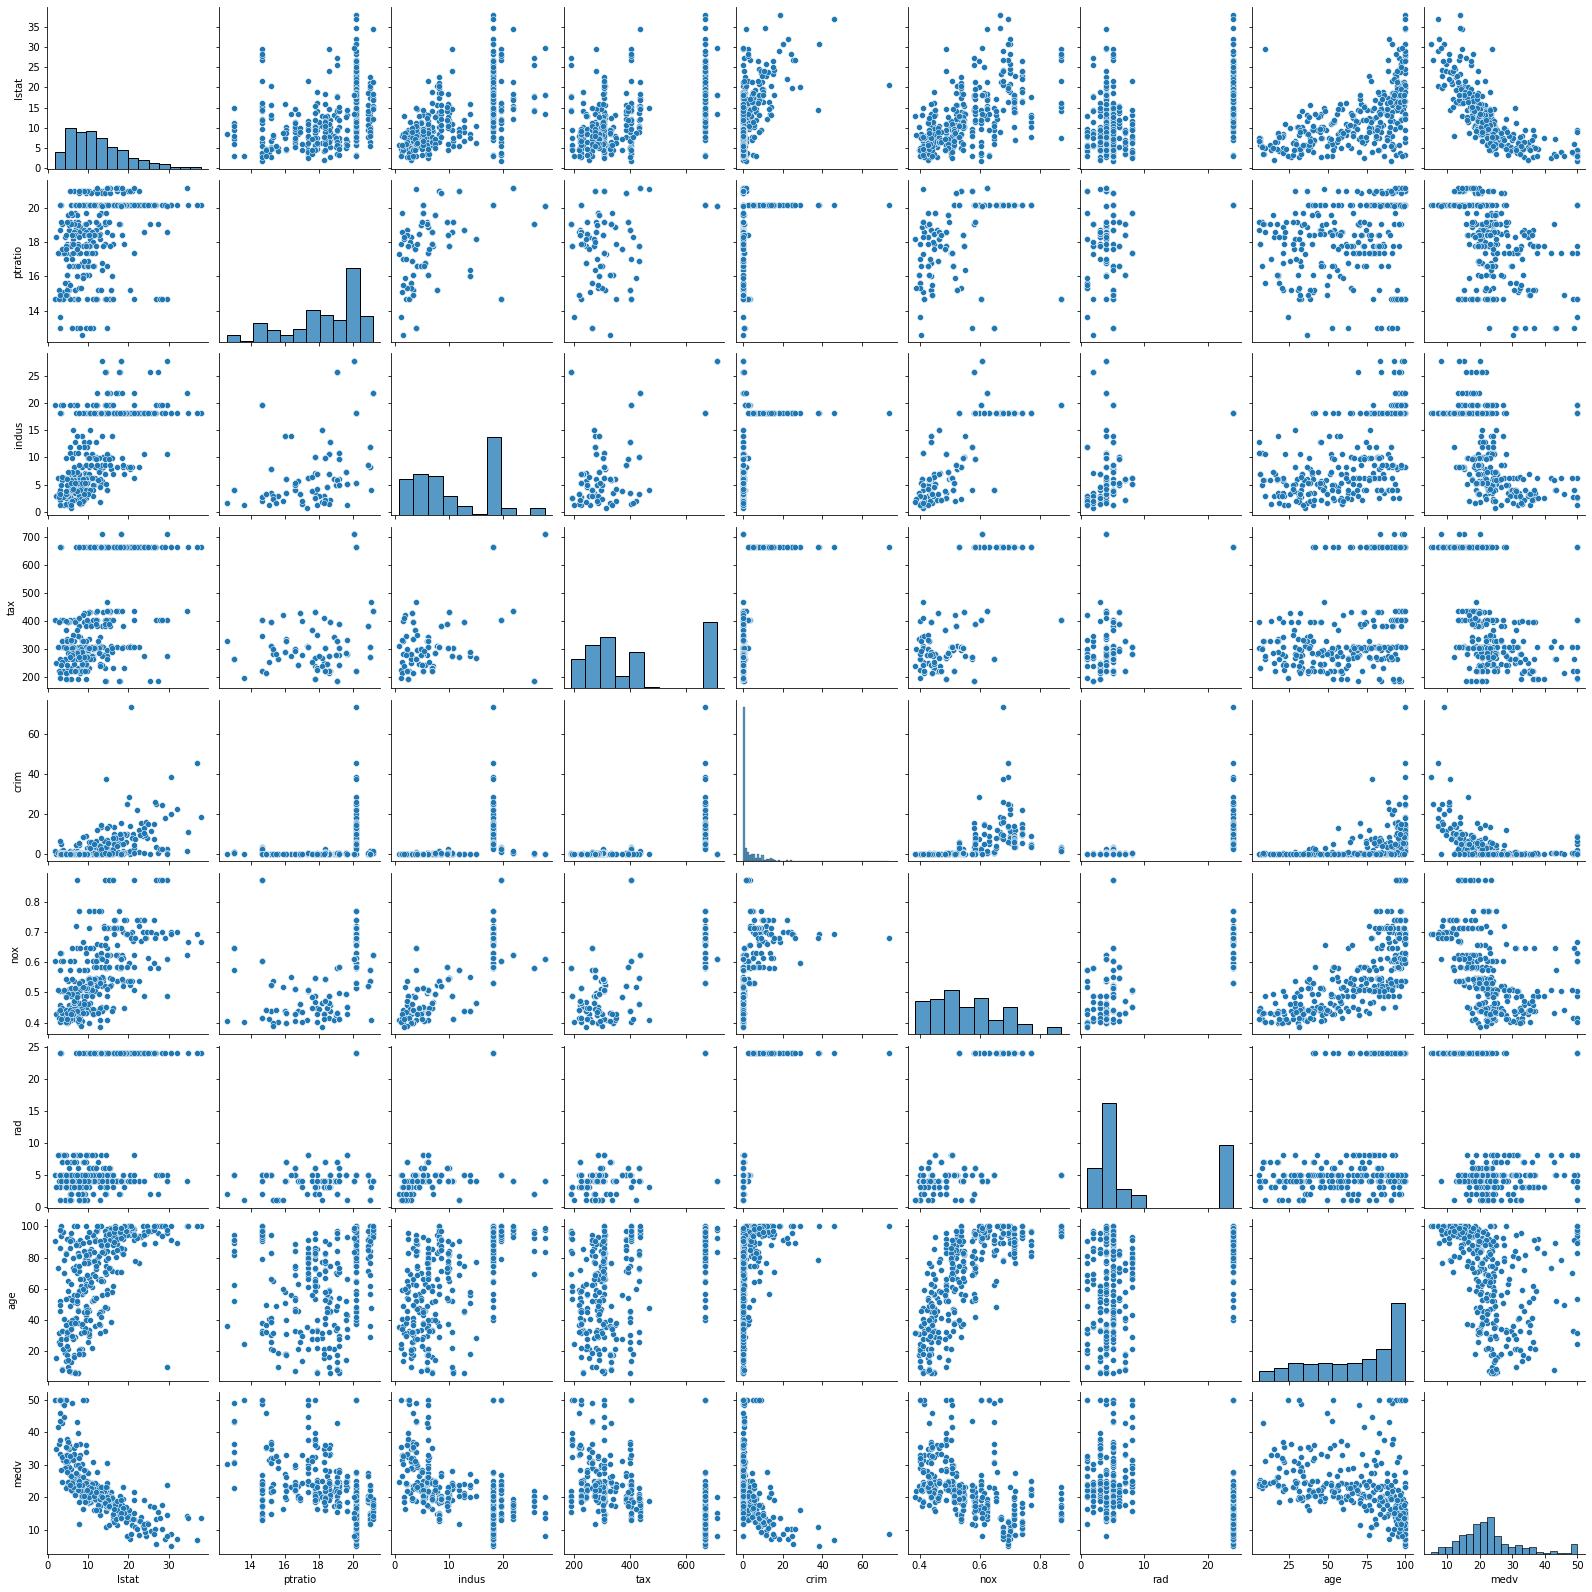

In [8]:
sns.pairplot(BostonTrain, vars = ['lstat', 'ptratio', 'indus', 'tax', 'crim', 'nox', 'rad', 'age', 'medv'])

Zero Correlation. When x and y are completely independent

Positive Correlation. When x and y go together

to the right more independent.

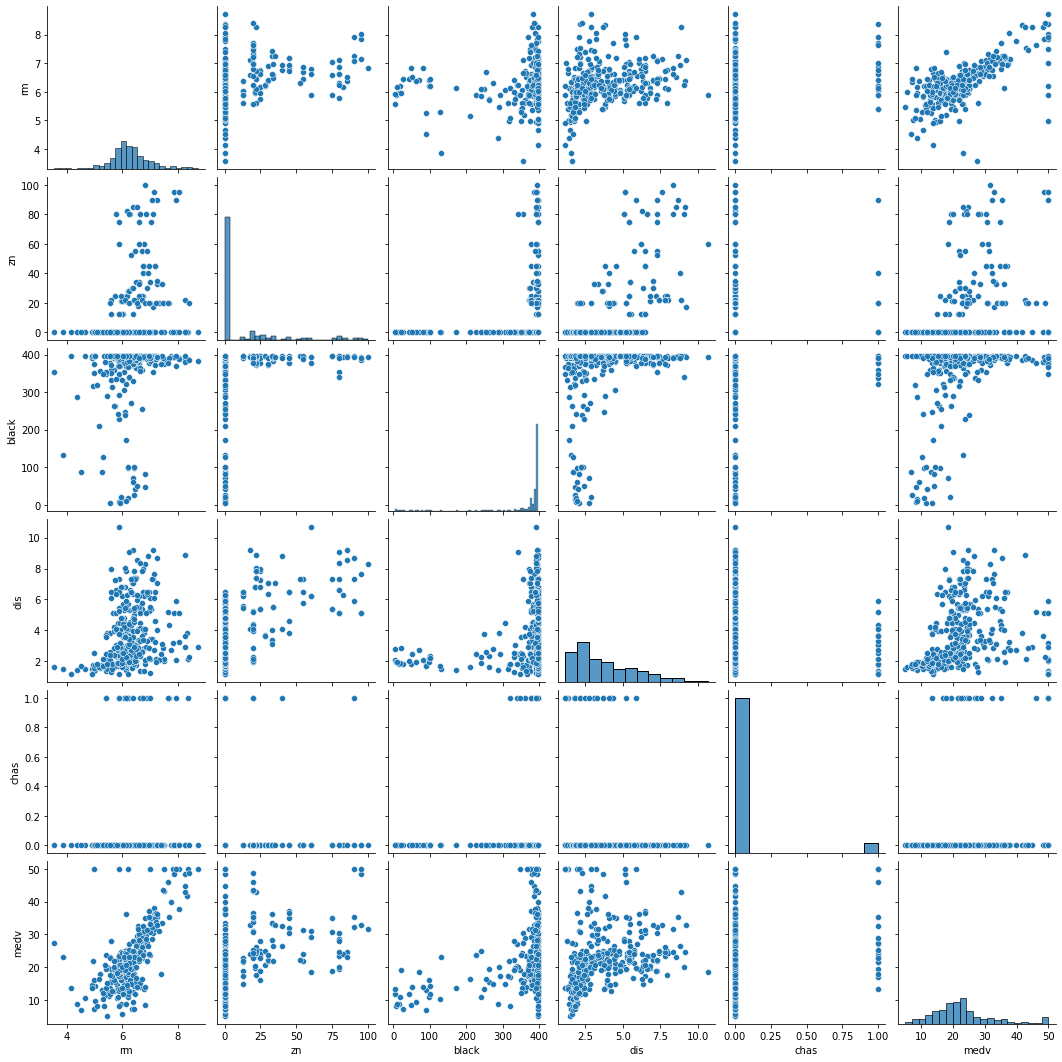

In [9]:
sns.pairplot(BostonTrain, vars = ['rm', 'zn', 'black', 'dis', 'chas','medv'])